# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load data

In [2]:
# Load the dataset
shopeasy_df = pd.read_csv('shopEasy.csv')

# Display the first five rows of the dataset
shopeasy_df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


# Look at data

In [3]:
print(f'There are {shopeasy_df.shape[0]} rows and {shopeasy_df.shape[1]} columns in the dataset.')

There are 8950 rows and 21 columns in the dataset.


In [4]:
shopeasy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
frequencyIndex,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
itemCosts,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
singleItemCosts,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
multipleItemCosts,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
emergencyFunds,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
itemBuyFrequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
singleItemBuyFrequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
multipleItemBuyFrequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
emergencyUseFrequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Dataset Overview
The features encompass a range of user behaviors, financial transactions, and demographic data. Here's a careful interpretation of each feature:

### Financial and Transactional Data
- **`accountTotal`**: The average total amount spent by users is $1,564.47, with a wide range in spending (min: $0, max: $19,043.14). This indicates diverse spending habits among users.
- **`itemCosts`**: Users on average spend $1,003.20 on items, but with significant variation (std: $2,136.63), suggesting differing purchasing power or preferences.
- **`singleItemCosts`** and **`multipleItemCosts`**: The average costs for single-item and multiple-item purchases are $592.44 and $411.07, respectively. The higher mean and standard deviation for single-item costs imply more substantial one-time purchases.
- **`monthlyPaid`**: On average, users pay $1,733.14 per month, with a high standard deviation (std: $2,895.06), highlighting varied monthly spending behaviors.
- **`leastAmountPaid`**: The least amount paid in a single transaction averages at $864.21, but varies greatly among users.

### User Behavior Metrics
- **`frequencyIndex`**, **`itemBuyFrequency`**, **`singleItemBuyFrequency`**, **`multipleItemBuyFrequency`**: These features indicate shopping frequency, with mean values less than 1 for most, except for `frequencyIndex`. This suggests users are not frequent shoppers, with occasional spikes in purchasing behavior.
- **`emergencyUseFrequency`** and **`emergencyCount`**: Users infrequently use emergency funds (mean: 0.135), but there's a significant range in the number of times these funds are used (std: 6.82).

### ShopEasy Specific Features
- **`emergencyFunds`**: Users keep an average of $978.87 in emergency funds, but the high standard deviation indicates a wide variation in this behavior.
- **`maxSpendLimit`**: The average maximum spend limit set by ShopEasy is $4,494.45, suggesting trust in users' spending ability.
- **`accountLifespan`**: Most users have been registered with ShopEasy for around 11.5 months, indicating a relatively new user base.
- **`webUsage`**: The average web usage score is 49.42, suggesting a moderate level of engagement through web browsers.

### Implications for Customer Segmentation
The diversity in spending habits, frequency of purchases, and user engagement levels highlighted by the dataset underscores the need for personalized marketing strategies. Segmenting customers based on these features will enable ShopEasy to tailor experiences, offers, and services to different user groups, enhancing customer satisfaction and loyalty.


In [5]:
shopeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

There are three text fields: 'personId', 'location' and 'accountType'

In [6]:
# Check if 'personId' is unique
shopeasy_df["personId"].is_unique

True

'personId' is unique and can be dropped.

In [7]:
#Drop 'personId'
shopeasy_df.drop('personId', axis=1, inplace=True)

In [8]:
# Count NaN values
missing_values = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


'maxSpendLimit' and 'leastAmountPaid' have respectively 1 and 313 missing values.

# Handle missing data

## Data Cleaning and Imputation

In this section, we perform targeted data cleaning and imputation to address missing or illogical values in the `leastAmountPaid` feature of our dataset. This feature represents the least amount paid by a user in a single transaction, and ensuring its accuracy is crucial for our analysis. We also dropped the row with missing `maxSpendLimit` data as it was only one row.

### Steps for Data Imputation:

1. **Zero Imputation for Zero Item Counts:**
   - For users who have not purchased any items (`itemCount` == 0), it's logical to assume that the least amount paid should also be zero. This assumption is based on the understanding that no transaction means no payment.
   - Code: `shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0`

2. **Using Item Costs for Single Item Purchases:**
   - When a user has purchased only one item (`itemCount` == 1), the `leastAmountPaid` should logically be equal to the cost of that item (`itemCosts`). This step corrects any discrepancies where the least amount paid doesn't match the item cost for single-item purchases.
   - Code: `shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['itemCosts']`

3. **Median Imputation for Remaining Missing Data:**
   - For the rest of the missing data in the `leastAmountPaid` column, we use median imputation. The median is chosen over the mean as it is less sensitive to outliers, making it a more robust measure for imputation in skewed distributions.
   - This step ensures that all records have a meaningful and statistically reasonable value for `leastAmountPaid`, enhancing the reliability of our subsequent analyses.
   - Code: `shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)`


In [9]:
shopeasy_df.dropna(subset=['maxSpendLimit'], inplace=True)

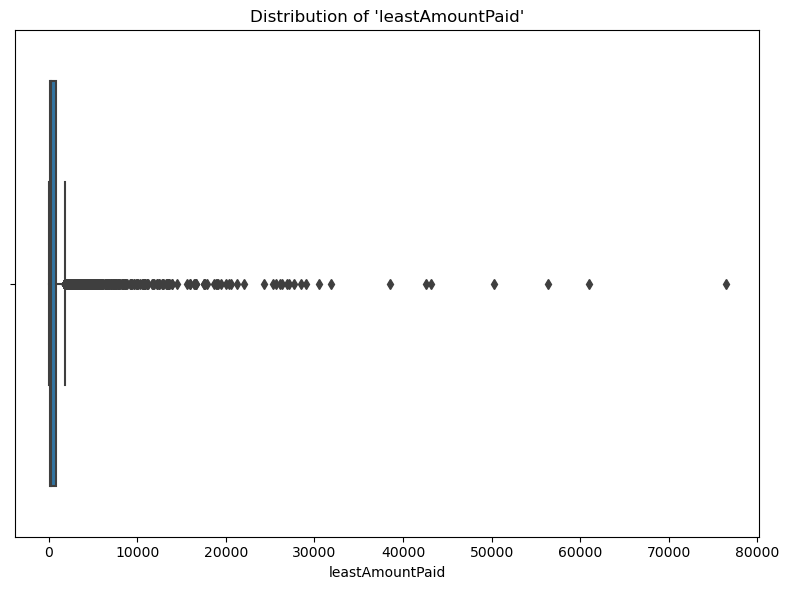

In [10]:
# Distribution of 'leastAmountPaid'
plt.figure(figsize=(8, 6))

sns.boxplot(x=shopeasy_df['leastAmountPaid'])
plt.title("Distribution of 'leastAmountPaid'")

plt.tight_layout()
plt.show()

In [11]:
# Substitute with 0 where 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'itemCosts' where 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['itemCosts']

# Substitute with the median for the remaining missing data
shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)

In [12]:
# Count NaN values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


# Handle categorical data

## Encoding Categorical Features

In preparation for clustering, we need to convert categorical features into a numerical format. This step is crucial as clustering algorithms require numerical inputs to calculate distances or similarities between data points.

### Encoding Strategy:

1. **One-Hot Encoding for 'location':**
   - The `location` feature is a nominal categorical variable with no inherent order (e.g., city names). 
   - We use One-Hot Encoding for this feature to prevent the introduction of artificial ordinality. In One-Hot Encoding, each unique value in the `location` column is transformed into a separate binary (0 or 1) column, ensuring that no unintended order is implied.
   - Code: `shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])`

2. **Label Encoding for 'accountType':**
   - Contrary to `location`, `accountType` is an ordinal categorical feature with a meaningful order (Regular, Premium, Student). 
   - We use Label Encoding for `accountType` to preserve this inherent order. Label Encoding assigns a unique integer to each category according to its order. This approach is suitable for ordinal data where the relative ordering of categories carries meaningful information.
   - Code: 
     ```python
     le = LabelEncoder()
     shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])
     ```

3. **Dropping the Original 'accountType' Column:**
   - After encoding `accountType`, the original column is redundant and can be dropped from our dataset.
   - Code: `shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)`

4. **Dataframe Preview:**
   - Finally, we display the first five rows of the modified dataframe to verify our encoding.
   - Code: `shopeasy_df_encoded.head()`

Through these encoding steps, our dataset is now transformed into a completely numerical format, making it ready for clustering and other machine learning algorithms that require numerical inputs.


In [13]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the first five rows of the encoded dataframe
shopeasy_df_encoded.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,1500.0,236.764555,207.007715,0.00,6,60,False,False,True,0
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,2000.0,89.741508,0.000000,0.00,6,5,False,True,False,0
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,2500.0,234.271939,334.730000,0.25,12,21,False,False,True,2
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,...,5000.0,0.000000,12.650000,0.00,12,53,True,False,False,0
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1500.0,118.438703,57.000000,0.00,6,59,False,False,True,0


# Univariate Analysis

The `plot_distribution` function creates a grid of Kernel Density Estimate (KDE) plots for the numeric columns in a DataFrame. 

- It takes two arguments: a DataFrame `df` and a string `title`.
- The subplot grid is set to have 3 rows, and the number of columns per row is calculated based on the total number of numeric columns.
- A new figure is created with a size that depends on the number of subplots.
- A loop is used to create a subplot for each numeric column. For each subplot:
  - A KDE plot is created for the current column, with the area under the curve filled.
  - The title of the subplot is set to the name of the current column.
  - The x and y labels are set to 'Value' and 'Density', respectively.
- The title of the figure is set to the `title` argument passed to the function.
- `plt.tight_layout()` is used to adjust the subplot parameters so that the subplot(s) fit into the figure area.
- Finally, the figure is displayed with `plt.show()`.

In [14]:
all_columns = shopeasy_df_encoded.columns.tolist()
num_all_columns = len(all_columns)

numeric_columns = shopeasy_df.select_dtypes(include=['number']).columns.tolist()
num_numeric_columns = len(numeric_columns)

categoric_columns = all_columns[num_numeric_columns:]
num_categoric_columns = len(categoric_columns)

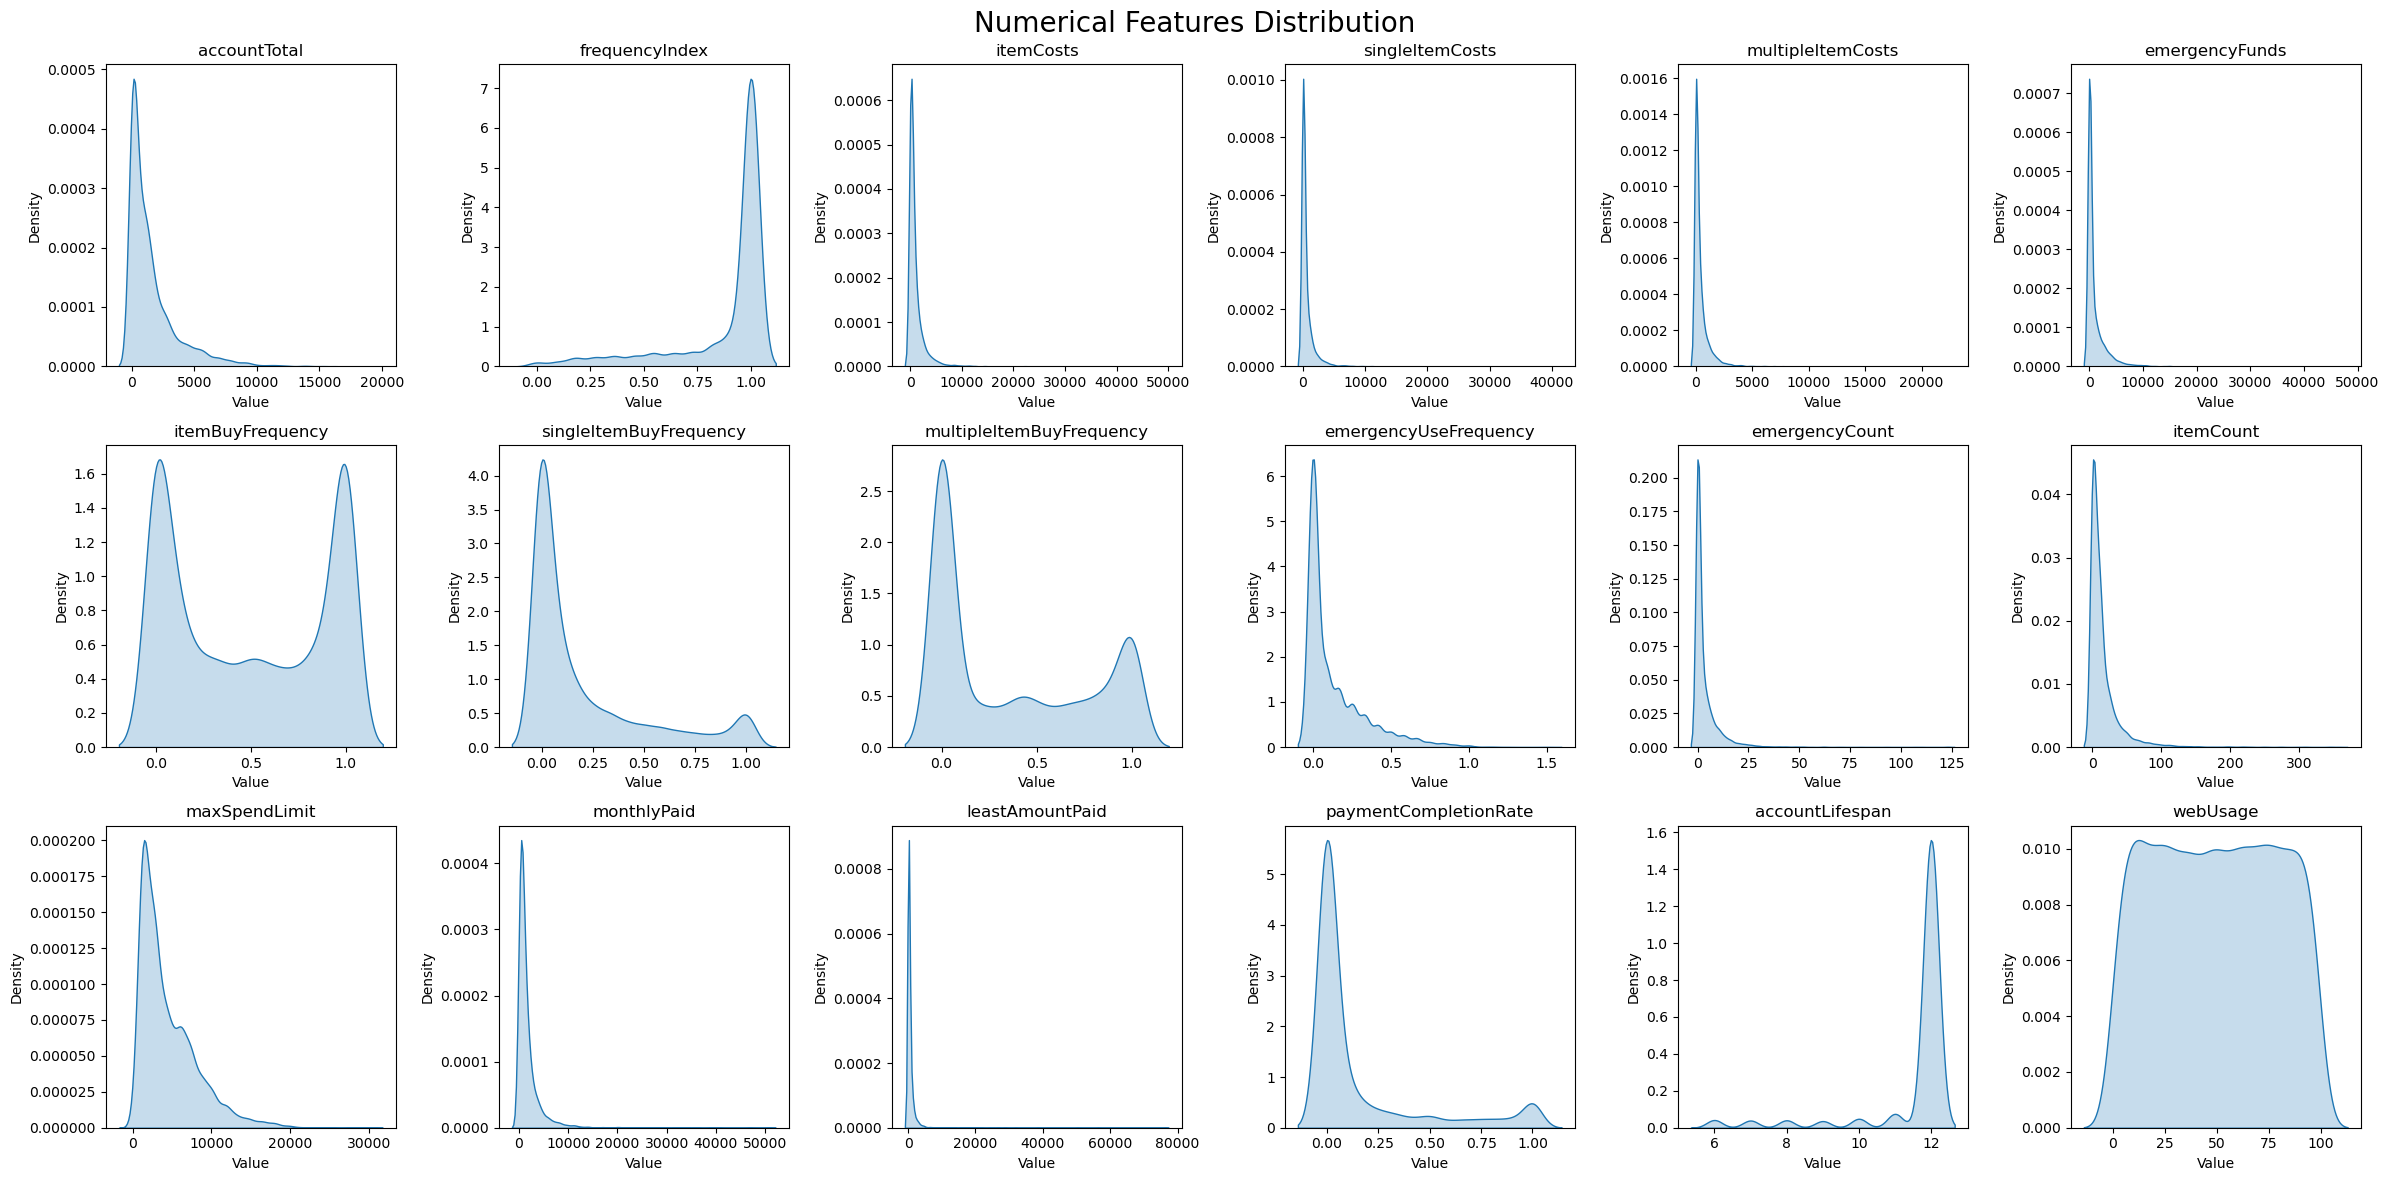

In [15]:
def plot_distribution(df, title):  
    num_rows = 3
    num_columns_per_row = (num_numeric_columns // num_rows)

    plt.figure(figsize=(4 * num_columns_per_row, 4 * num_rows)) 

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_columns_per_row, i)
        sns.kdeplot(df[column], fill=True)
        plt.title(f'{column}')
        plt.xlabel('Value')
        plt.ylabel('Density')
    
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

plot_distribution(shopeasy_df_encoded, 'Numerical Features Distribution')


## Distribution Analysis of Numerical Features

The plots above present the distribution of each numerical feature in the ShopEasy dataset. These plots are fundamental for understanding the data's distribution, which is essential for data preprocessing and provides insights into feature characteristics.

### Observations from Histograms:

- **`accountTotal`, `itemCosts`, `singleItemCosts`, `multipleItemCosts`, `emergencyFunds`, `monthlyPaid`, `leastAmountPaid`:**
  These features display highly right-skewed distributions, indicating that a majority of the users have lower values with fewer users having very high values. Such distributions are common in financial data where only a small fraction of users engage in high-value transactions.

- **`frequencyIndex`, `itemBuyFrequency`, `singleItemBuyFrequency`, `multipleItemBuyFrequency`, `emergencyUseFrequency`:**
  These features appear to have bimodal or multimodal distributions, suggesting the presence of distinct user groups with different shopping frequencies.

- **`emergencyCount`, `itemCount`:**
  These features show a large number of occurrences at the lower end and very few at the high end, again indicating that most users make fewer transactions or purchases.

- **`maxSpendLimit`:**
  The distribution shows that while many users have a lower spend limit, there is a wide range of limits set by ShopEasy, reflecting the diversity in user profiles and potentially their creditworthiness.

- **`paymentCompletionRate`:**
  This feature has a peak at the lower end, suggesting that many users may not complete payments or prefer partial payments. There's also a smaller peak near 1, indicating another group of users who frequently complete their payments.

- **`accountLifespan`:**
  A large number of users have been on the platform for a similar duration, evidenced by the sharp peak, which could be due to a successful campaign in a specific period that attracted many new users.

- **`webUsage`:**
  The nearly uniform distribution of the `webUsage` feature contrasts with the other features, suggesting that web usage is spread relatively evenly across different intervals.

## What about categorical features? ...

This code creates a grid of bar plots for the specified categorical columns in a DataFrame `shopeasy_df`.

- It first specifies the categorical columns to plot.
- The number of rows and columns for the subplot grid is determined based on the total number of categorical columns.
- A new figure is created with a size that depends on the number of subplots.
- A loop is used to create a subplot for each categorical column. For each subplot:
  - A bar plot is created for the current column, showing the count of each category. The categories are ordered by their frequency.
  - The title of the subplot is set to 'Frequency of {column}'.
- `plt.tight_layout()` is used to adjust the subplot parameters so that the subplot(s) fit into the figure area.
- Finally, the figure is displayed with `plt.show()`.

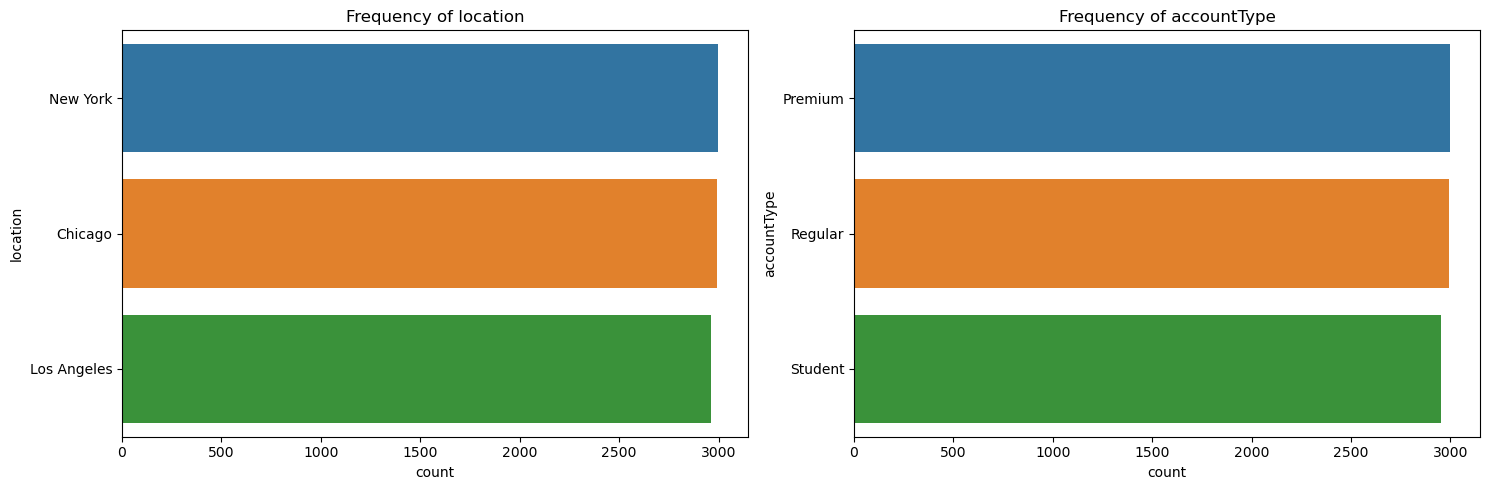

In [16]:
categorical_features = ['location', 'accountType']

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


## Analysis of User Distribution by Location and Account Type

The provided bar charts illustrate the distribution of users by `location` and `accountType` within the ShopEasy platform.

### Frequency of Location
- The chart indicates a higher user base in **Los Angeles**, followed by **Chicago**, and then **New York**.
- This distribution suggests that ShopEasy has the most significant market penetration or popularity in Los Angeles.

### Frequency of Account Type
- **Regular** accounts are the most prevalent among users, which suggests that the standard service offering meets the needs of the majority.
- **Premium** accounts come in second, indicating a sizeable portion of the user base opts for or qualifies for enhanced services.
- **Student** accounts are the least common, which may reflect the platform's demographic targeting or the specific appeal and marketing effectiveness towards different user groups.

### Strategic Implications
- **Regional Preferences**: The geographical distribution offers insights for targeted marketing and logistical planning to cater to regional demands.
- **Service Personalization**: Knowledge of the account type distribution can inform the personalization of services and features to better serve different user groups.
- **User Engagement**: Understanding the proportion of premium versus regular users can inform strategies aimed at converting users to higher service tiers, potentially increasing overall revenue.

These insights can be pivotal for ShopEasy's business strategy, informing decisions on marketing, service customization, and user engagement initiatives.


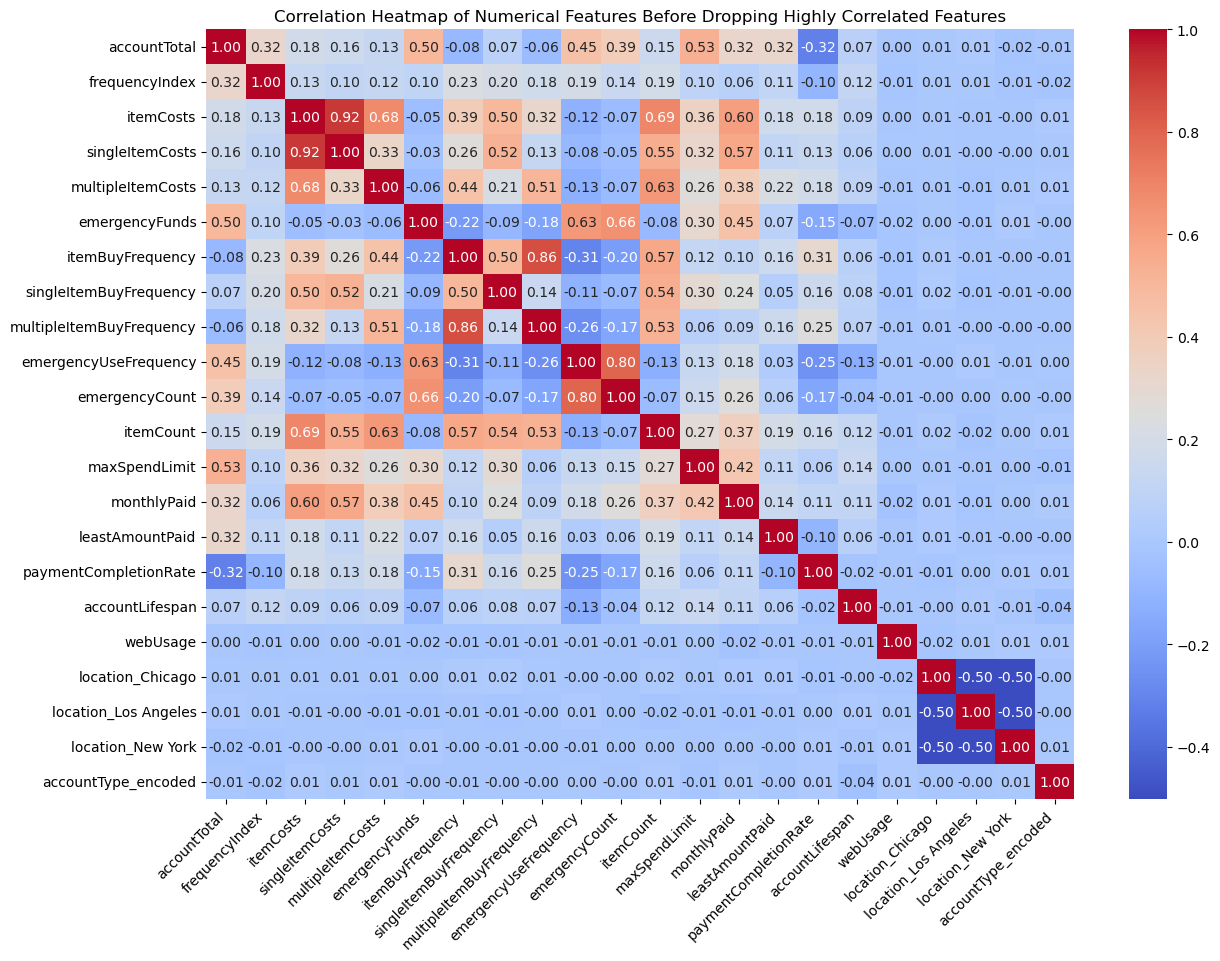

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(shopeasy_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features Before Dropping Highly Correlated Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## Correlations Analysis

#### 1. **Item Costs vs. Single Item Costs (Correlation: 0.916844)**
- **Explanation**: This high correlation suggests that the total cost of items is strongly influenced by the cost of items bought in single purchases. It implies that single-item purchases are a significant part of the total item costs.

#### 2. **Item Costs vs. Multiple Item Costs (Correlation: 0.679889)**
- **Explanation**: Although below the initial threshold, this significant correlation indicates that the total cost of items purchased also has a substantial relationship with the cost of items bought in installments.

#### 3. **Item Buy Frequency vs. Multiple Item Buy Frequency (Correlation: 0.862921)**
- **Explanation**: The strong correlation indicates that the overall frequency of purchases is largely influenced by the frequency of installment-based purchases.

#### 4. **Emergency Use Frequency vs. Emergency Count (Correlation: 0.799573)**
- **Explanation**: Indicates a close relationship between the frequency of using emergency funds and the number of times these funds have been used.

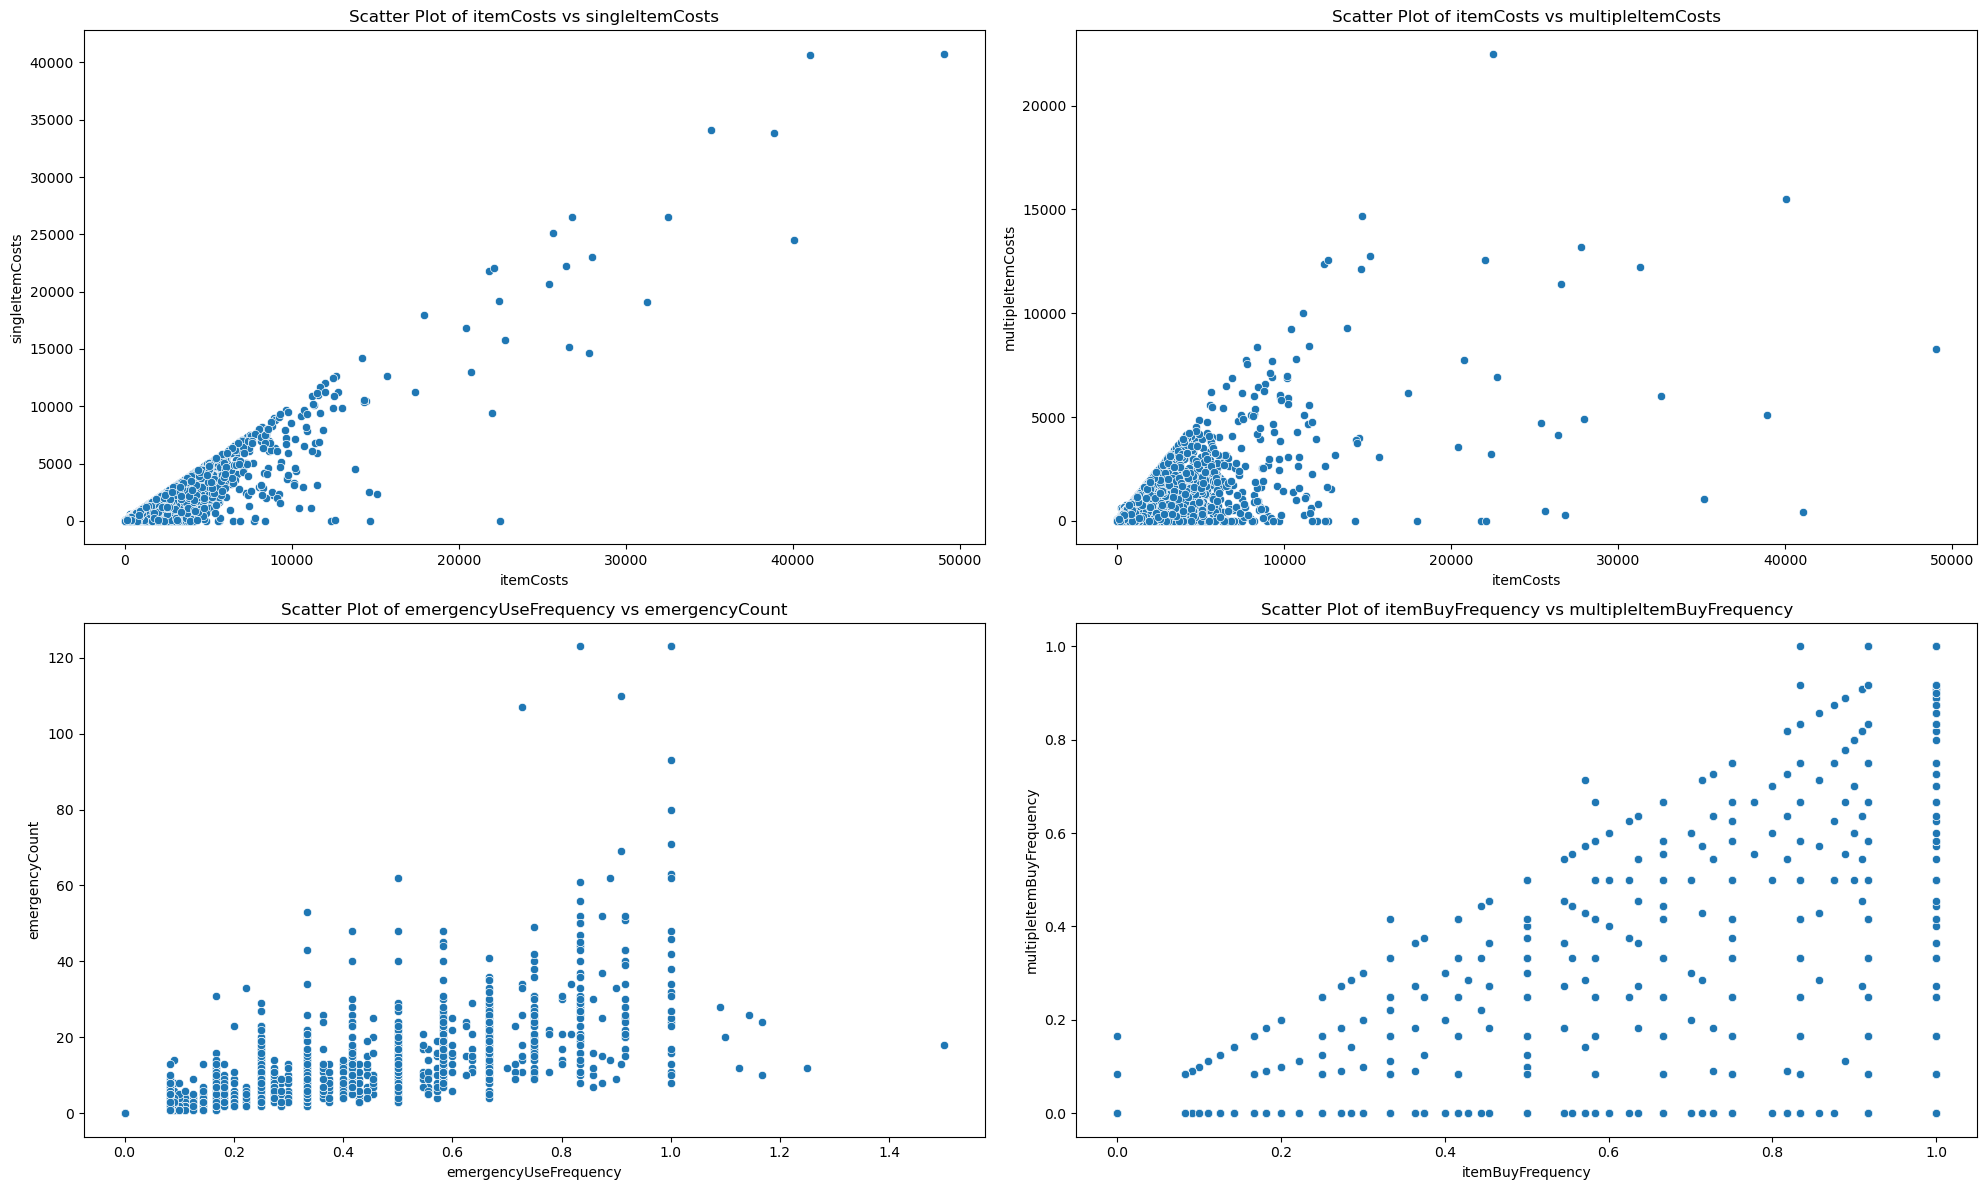

In [18]:
# Sample pairs of features with high correlations
high_corr_pairs = [('itemCosts', 'singleItemCosts'), ('itemCosts','multipleItemCosts'), ('emergencyUseFrequency', 'emergencyCount'), ('itemBuyFrequency','multipleItemBuyFrequency')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_encoded, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

### Rationale for Excluding Certain Features

#### **SingleItemCosts & MultipleItemCosts as subsets of ItemCosts**
- **Redundancy Issue**: `singleItemCosts` and `multipleItemCosts` are subsets of the total `itemCosts`. Including these specific subsets along with the total costs can lead to redundancy in the data. 
- **Clustering Implication**: For clustering, the goal is often to capture distinct patterns or groups in the data. Since `itemCosts` already encapsulates the total expenditure, including its subsets (single and multiple item costs) might not contribute additional distinct information for cluster formation.
- **Data Simplification**: Removing these subsets simplifies the dataset while retaining the core information encapsulated by `itemCosts`, making the clustering more efficient and focused.

#### **Choosing EmergencyCount over EmergencyUseFrequency**
- **Quantitative vs. Qualitative Data**: `emergencyCount` provides a quantitative measure of how many times emergency funds have been used, offering concrete data. `emergencyUseFrequency`, while useful, offers a more qualitative insight and might be less precise for clustering.

#### **Choosing ItemBuyFrequency over MultipleItemBuyFrequency**
- **Broader Scope**: `itemBuyFrequency` captures the overall purchasing frequency, encompassing all types of purchases. This offers a more holistic view of a customer's shopping habits compared to `multipleItemBuyFrequency`, which is more specific.
- **Representative Data**: `itemBuyFrequency` is more representative of the user's general activity on the platform. Clustering based on overall activity can yield more universally applicable insights than focusing solely on installment-based purchases.


# Trivariate Analysis - let's look at the interactions of categorical features

## Key Feature Relationships for Customer Behavior Insights

In our analysis, we focus on pairs of features that are likely to provide the most valuable insights into customer behavior and ShopEasy's business strategy. By examining the interplay between these pairs, we can derive actionable insights that may enhance personalized marketing efforts, inventory management, credit policies, and customer loyalty programs.

### Analyzed Feature Pairs:


## 1. **AccountTotal and FrequencyIndex:**
   - This pair is instrumental in revealing the dynamics between a user's total expenditure on the platform and their shopping frequency. We hypothesize that a positive correlation might exist — users who shop more frequently could be contributing a significant portion of ShopEasy's revenue.
   - Insight from this analysis could inform the design of loyalty programs, ensuring they are optimally structured to reward and incentivize the most valuable and consistent shoppers.


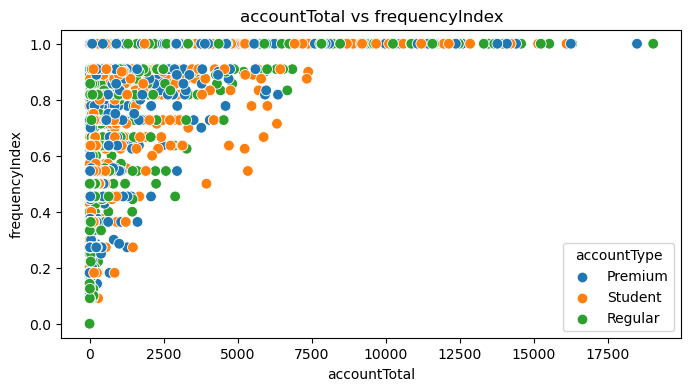

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='accountTotal',y='frequencyIndex',
    hue='accountType',s=60
)
plt.title('accountTotal vs frequencyIndex')
plt.show()

The scatter plot visualizes the relationship between total spending (`accountTotal`) and shopping frequency (`frequencyIndex`) without distinguishing between account types. This approach is justified by the observation that the `accountType` variable does not significantly contribute to customer segmentation. 

### Observations:

- **General Spending Trends:**
  - We observe a broad range of `accountTotal` values, indicating diverse spending behaviors among all users.
  - A high `frequencyIndex` is common across the dataset, suggesting that many users, regardless of account type, engage with the platform frequently.
  - The presence of outliers suggests segments of customers with unique spending patterns, such as high spenders who transact infrequently.

- **Concentration of Frequent, Low-Spend Users:**
  - A dense cluster of users with low overall spending but high shopping frequency indicates a substantial user base that engages with the platform regularly but spends less per transaction.

- **Outliers Indicating High-Value Customers:**
  - Users with high total spending and varied shopping frequencies may represent high-value customers who could be targeted with personalized marketing strategies.

### Strategic Implications:

- **Segmentation Based on Spending and Frequency:**
  - Without the distinction of account type, segmentation can focus more directly on spending and frequency behaviors. This allows for a more behavior-centric approach to marketing and loyalty programs.

- **Universal Loyalty and Engagement Programs:**
  - The data suggests a universal loyalty program could be effective, rewarding users based on objective measures of engagement such as transaction frequency and spending levels.

- **Resource Allocation:**
  - By not segmenting by `accountType`, ShopEasy can allocate resources and marketing efforts more efficiently based on behavioral data, potentially leading to a more data-driven and less biased approach.

## 2. **ItemCosts and ItemBuyFrequency:**
   - By comparing the aggregate cost of items purchased with the frequency of transactions, we can identify patterns such as whether users making frequent smaller purchases contribute more to the revenue than those making infrequent larger purchases.
   - This analysis is crucial for inventory stocking and management, as well as for crafting personalized product recommendations that resonate with users' purchasing rhythms.


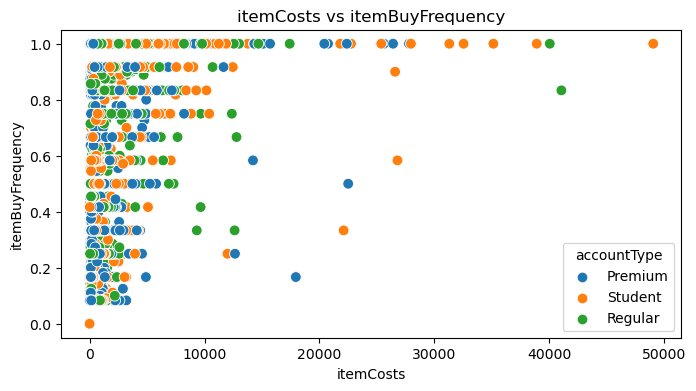

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='itemCosts',y='itemBuyFrequency',
    hue='accountType',s=60
)
plt.title('itemCosts vs itemBuyFrequency')
plt.show()

## Analysis of Item Costs vs. Item Purchase Frequency

The scatter plot analysis indicates that `itemCosts` and `itemBuyFrequency` exhibit a general trend, where lower item costs correspond to higher purchase frequencies, and vice versa. This trend persists across the different account types: Premium, Student, and Regular.

### Key Observations:
- All account types are interspersed throughout the plot without distinct clustering, suggesting that `accountType` may not be a significant factor in determining the purchasing behavior of users in terms of item costs and buying frequency.
- The lack of clear separation by account type suggests that behavioral patterns related to spending and purchasing frequency could be more indicative of customer segmentation than the categorical `accountType`.

### Implications for Strategy:
- Marketing and customer engagement strategies might be more effective if they are tailored based on behavioral data such as spending amounts and purchase frequencies, rather than on the `accountType`.
- This insight supports the potential refinement of the segmentation model to focus on quantitative behavioral metrics, which seem to offer clearer differentiation among customers, thereby enabling more targeted and personalized user experiences.

### Output:
- It may be beneficial to consider excluding `accountType` as a primary axis for segmentation and instead focus on the more demonstrative quantitative features that directly impact business objectives and customer value.


## 3. **EmergencyFunds and EmergencyUseFrequency:**
   - Understanding how users utilize their emergency funds in correlation with the frequency of such usage offers insights into consumer behavior under different purchasing conditions.
   - This data can reveal the impact of offering a financial cushion on customer loyalty and purchasing frequency, potentially validating the emergency fund as a feature that not only provides peace of mind to the users but also benefits ShopEasy's sales metrics.

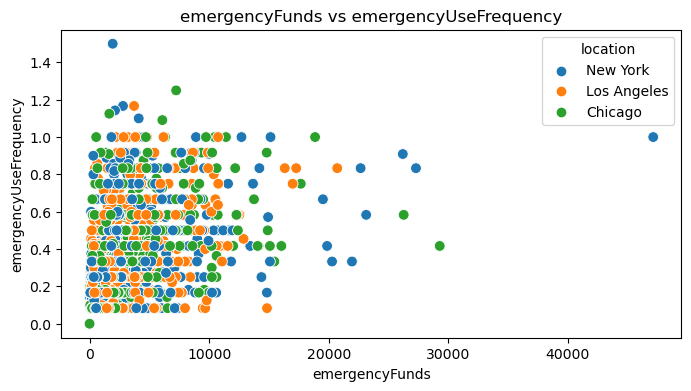

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='emergencyFunds',y='emergencyUseFrequency',
    hue='location',s=60
)
plt.title('emergencyFunds vs emergencyUseFrequency')   
plt.show()

## Analysis of Emergency Funds vs. Usage Frequency

The scatter plot assesses the relationship between the balance of emergency funds (`emergencyFunds`) and the frequency at which these funds are accessed (`emergencyUseFrequency`), across users from three different locations: New York, Los Angeles, and Chicago.

### Observations:

- A broad distribution is observed in the balance of emergency funds among users from all locations, indicating diverse financial behaviors concerning savings.
- There is no apparent correlation between the amounts saved and the frequency of emergency fund usage, suggesting that the decision to tap into these funds is not directly influenced by the amount available.
- The plot does not reveal distinct clusters based on location, implying that geographical factors may not significantly impact these particular financial habits.

### Strategic Implications:

- The absence of location-specific patterns suggests that financial tendencies regarding emergency funds might be similar across these cities. Consequently, location may not be a critical factor for segmenting users in the context of emergency fund behaviors.
- This insight could steer ShopEasy to offer more personalized financial services and savings incentives that cater to individual user behaviors, rather than geographic segmentation.
- Opportunities may exist for ShopEasy to educate users on prudent emergency fund practices, especially targeting those with lower savings and higher usage frequency.

### Segmentation Considerations:

- Segmenting users by financial behavior, such as savings amounts and usage patterns, could be more effective than by location for delivering tailored financial products and services.
- By leveraging these behavioral insights, ShopEasy could enhance its user experience with more relevant offerings that resonate with their specific financial needs and preferences.


### Implications:

It seems clear that both the categorical features `accountType` and `location` are not very useful for segmenting customers. 

In [22]:
rows_to_drop = ['singleItemCosts', 'multipleItemCosts', 'multipleItemBuyFrequency', 'emergencyUseFrequency', 'location_Chicago', 'webUsage', 'location_Los Angeles', 'location_New York', 'accountType_encoded']

def drop_row(df):
    for row in rows_to_drop:
        df.drop(row, axis=1, inplace=True)

drop_row(shopeasy_df_encoded)

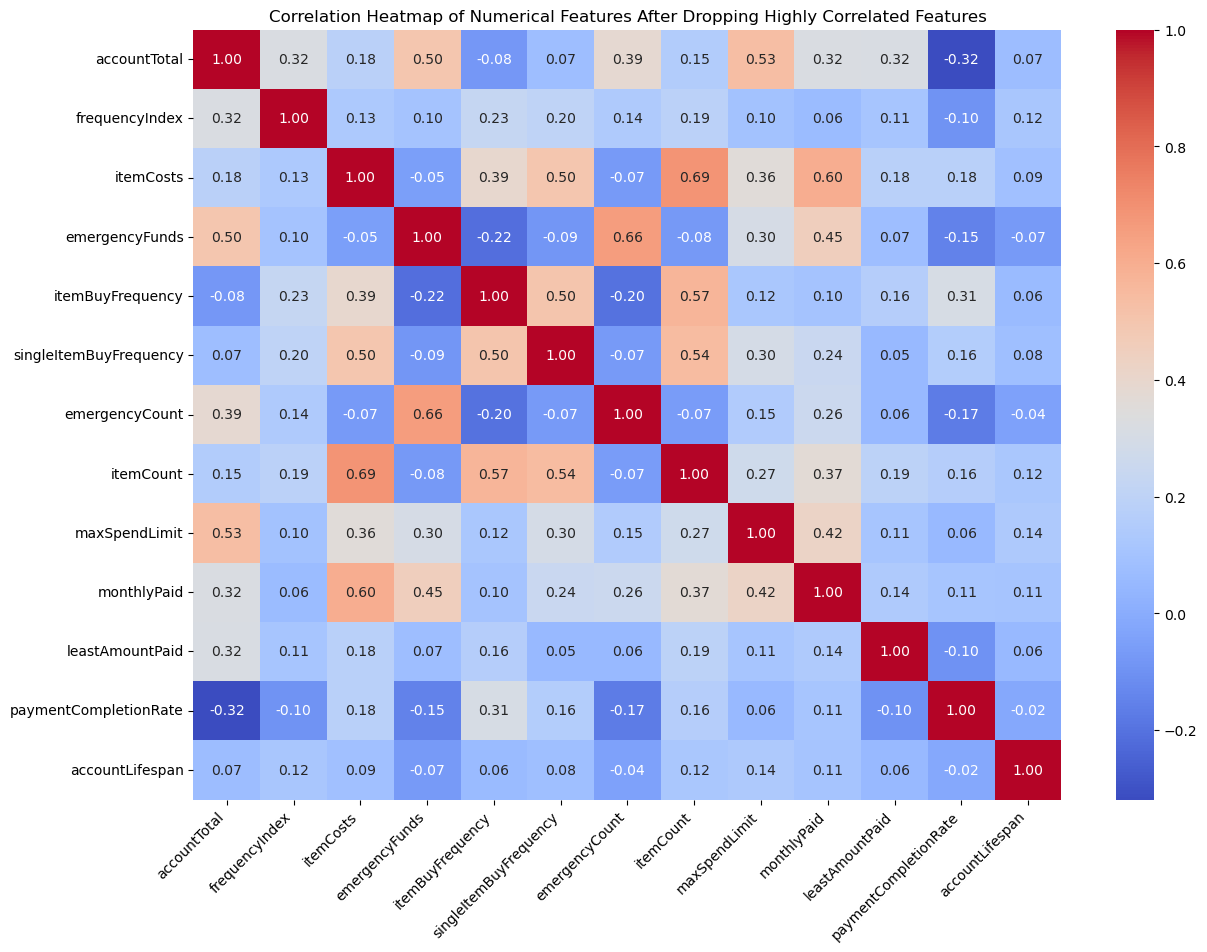

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(shopeasy_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features After Dropping Highly Correlated Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [24]:
correlation_matrix = shopeasy_df_encoded.corr()

print(correlation_matrix)

                        accountTotal  frequencyIndex  itemCosts  \
accountTotal                1.000000        0.322335   0.181230   
frequencyIndex              0.322335        1.000000   0.133586   
itemCosts                   0.181230        0.133586   1.000000   
emergencyFunds              0.496679        0.099312  -0.051495   
itemBuyFrequency           -0.078054        0.229440   0.392991   
singleItemBuyFrequency      0.073114        0.202295   0.498413   
emergencyCount              0.385139        0.141516  -0.067194   
itemCount                   0.154297        0.189527   0.689552   
maxSpendLimit               0.531283        0.095843   0.356963   
monthlyPaid                 0.322769        0.064842   0.603252   
leastAmountPaid             0.316187        0.109875   0.176876   
paymentCompletionRate      -0.319018       -0.095308   0.180356   
accountLifespan             0.072421        0.118566   0.086155   

                        emergencyFunds  itemBuyFrequency  \
a

## Unpacking Surprising Correlations

#### 1. **AccountTotal vs. ItemBuyFrequency (Correlation: -0.078054)**
- **Surprise Element**: Contrary to expectations, there's a slight negative correlation between the total amount spent and the overall frequency of purchases. This suggests that higher spending does not necessarily align with more frequent purchases, indicating varied buying patterns among users.

#### 2. **EmergencyFunds vs. EmergencyCount (Correlation: 0.656493)**
- **Surprise Element**: While a positive correlation is expected, the strength of this relationship is notable. It indicates that users who maintain higher emergency funds tend to use these funds more often, possibly reflecting a specific user segment that prefers having and using a safety net.

#### 3. **ItemCosts vs. ItemCount (Correlation: 0.689552)**
- **Surprise Element**: This moderate correlation is intriguing, as it implies that the total cost of items purchased is not always directly proportional to the number of items bought. This could point to a diverse range of item values and purchasing habits across users.

#### 4. **MonthlyPaid vs. ItemCosts (Correlation: 0.603252)**
- **Surprise Element**: The significant positive correlation here is interesting, as it shows that users who spend more on items also tend to have higher monthly payments. This could be indicative of users who make larger or more premium purchases, leading to higher monthly expenditure.

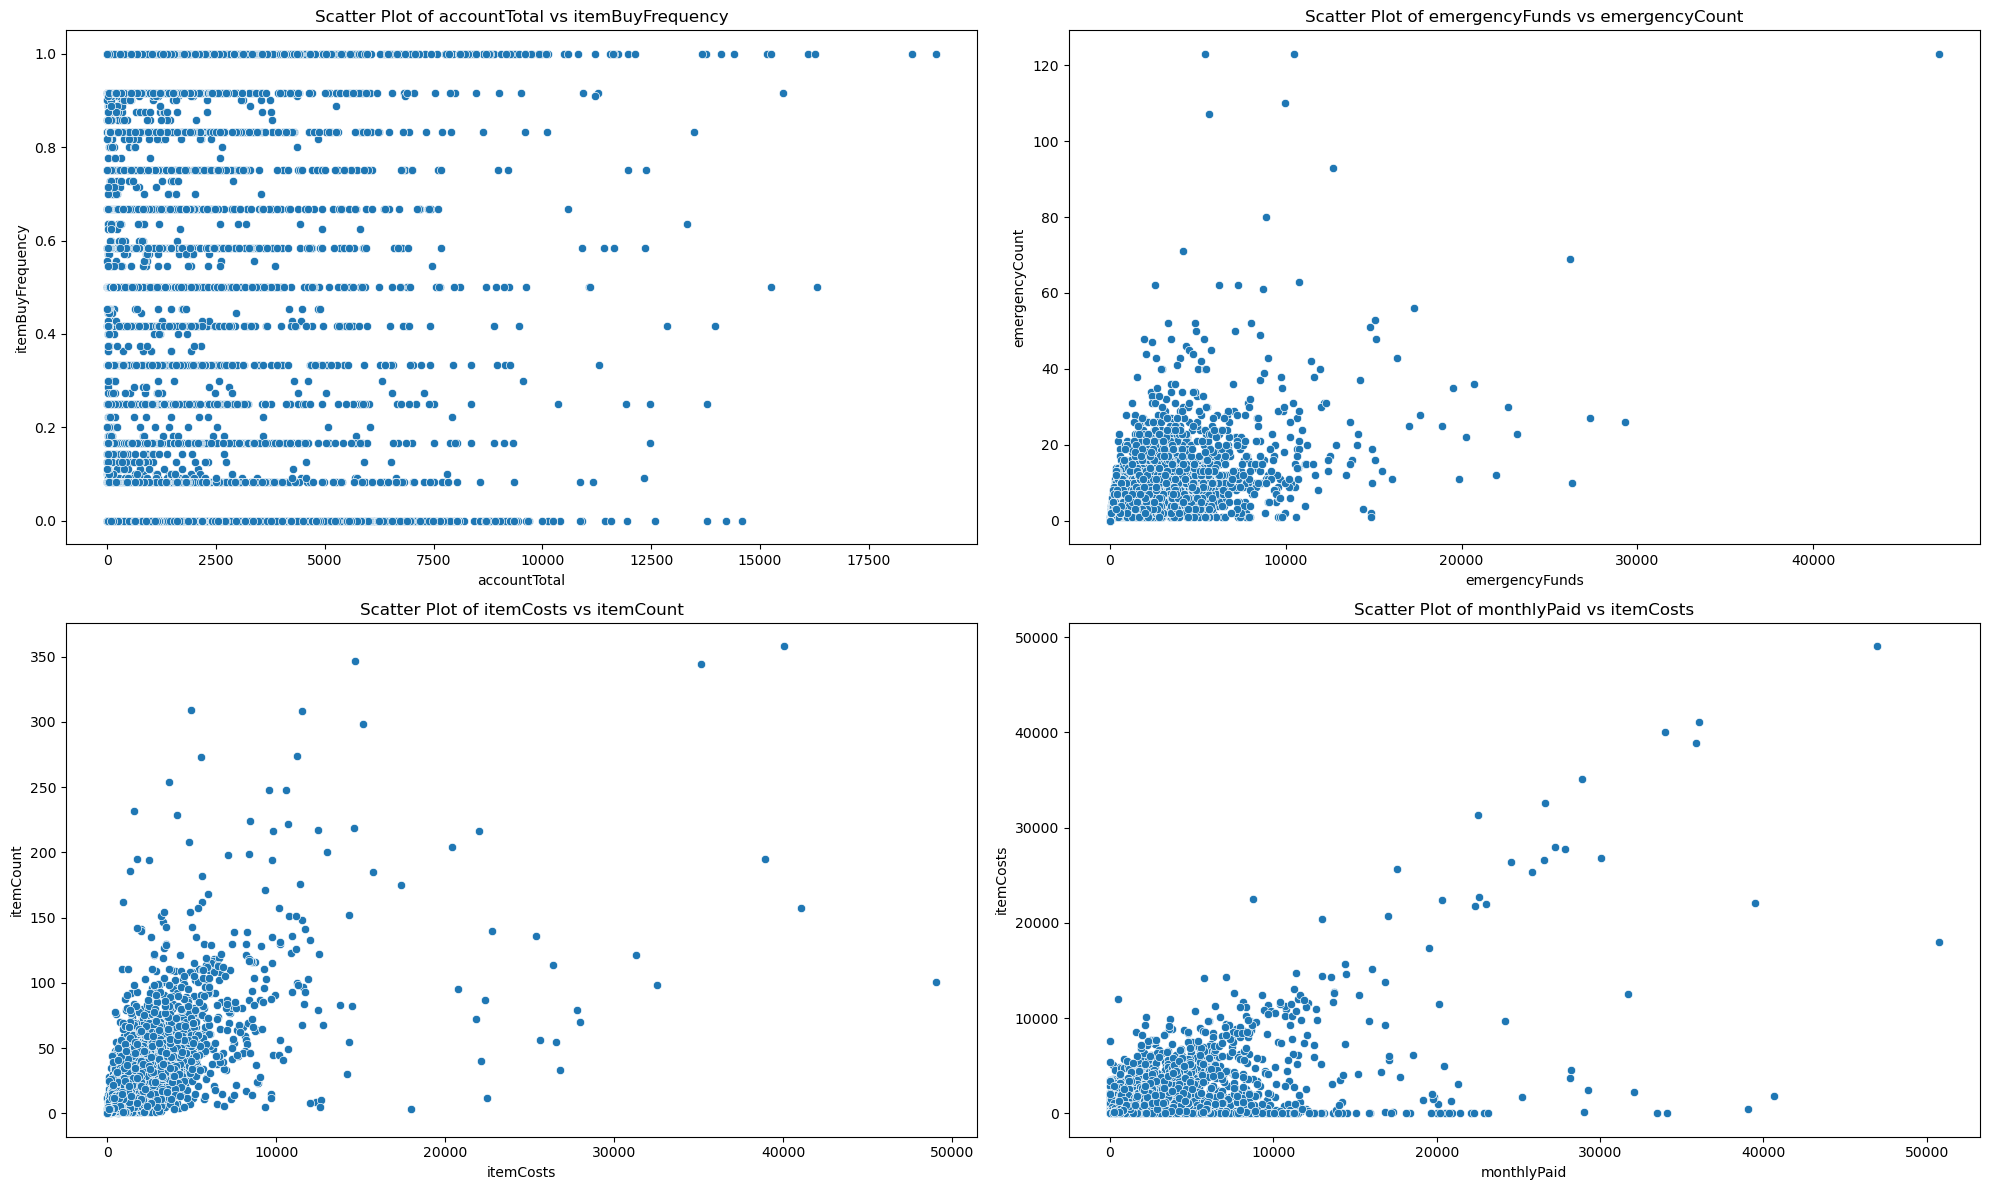

In [25]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('accountTotal', 'itemBuyFrequency'), ('emergencyFunds', 'emergencyCount'),  ('itemCosts', 'itemCount'), ('monthlyPaid', 'itemCosts')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_encoded, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

## Analysis of Surprising Correlations from Scatter Plots

The scatter plots visualize the relationships between pairs of variables that were identified as having surprising correlations in the ShopEasy dataset.

### Scatter Plot of accountTotal vs itemBuyFrequency
- The distribution shows no strong correlation between total amount spent and the frequency of purchases.
- This indicates that higher spenders on the platform do not necessarily make purchases more often.

### Scatter Plot of emergencyFunds vs emergencyCount
- A positive trend is visible, but it plateaus, suggesting that users with very high emergency funds use them less frequently.
- This could inform financial product offerings or incentives for saving on the platform.

### Scatter Plot of itemCosts vs itemCount
- The data is clustered towards the origin with outliers, indicating a mix of purchase behaviors with low and high-value items.
- This pattern suggests varied buying habits, with some users purchasing many low-cost items and others making fewer high-value purchases.

### Scatter Plot of monthlyPaid vs itemCosts
- A positive correlation is visible, with outliers indicating that high monthly payments are not always associated with high item costs.
- This may reflect different payment behaviors, such as installment plans or accumulated costs over time.

These insights are essential for developing targeted customer segmentation strategies, as they reveal complex and varied user spending and purchasing behaviors on the ShopEasy platform.


### Rationale for Selected Features in Pairplot

The selected features for the pairplot aim to provide a comprehensive understanding of customer behavior on the ShopEasy platform. Here's the reasoning behind each feature's inclusion:

- **`accountTotal`**: Reflects total spending, crucial for understanding overall user expenditure.
- **`frequencyIndex`**: Indicates shopping frequency, offering insights into how often users engage with the platform.
- **`itemCosts`**: Captures the total cost of purchased items, essential for analyzing spending behavior.
- **`emergencyFunds`**: Reveals the user's tendency to save for emergencies, indicating financial planning habits.
- **`itemBuyFrequency`**: Shows the overall purchase frequency, key for understanding customer activity levels.
- **`singleItemBuyFrequency`**: Provides insight into the frequency of single-item purchases, highlighting a specific shopping pattern.
- **`emergencyCount`**: The number of times emergency funds are used, reflecting user behavior in urgent situations.
- **`itemCount`**: Total number of items purchased, important for analyzing purchasing volume.
- **`maxSpendLimit`**: Indicates the spending capacity set by ShopEasy, shedding light on user trust and creditworthiness.
- **`monthlyPaid`**: Total monthly payments, useful for understanding consistent spending behavior.
- **`paymentCompletionRate`**: Shows the rate at which users complete their payments, an indicator of financial reliability.
- **`accountLifespan`**: The duration of the user's relationship with ShopEasy, offering insights into loyalty and long-term engagement.

These features collectively provide diverse yet relevant insights into customer spending patterns, purchase frequency, financial habits, and overall engagement, making them ideal for segmentation analysis through a pairplot.


c:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


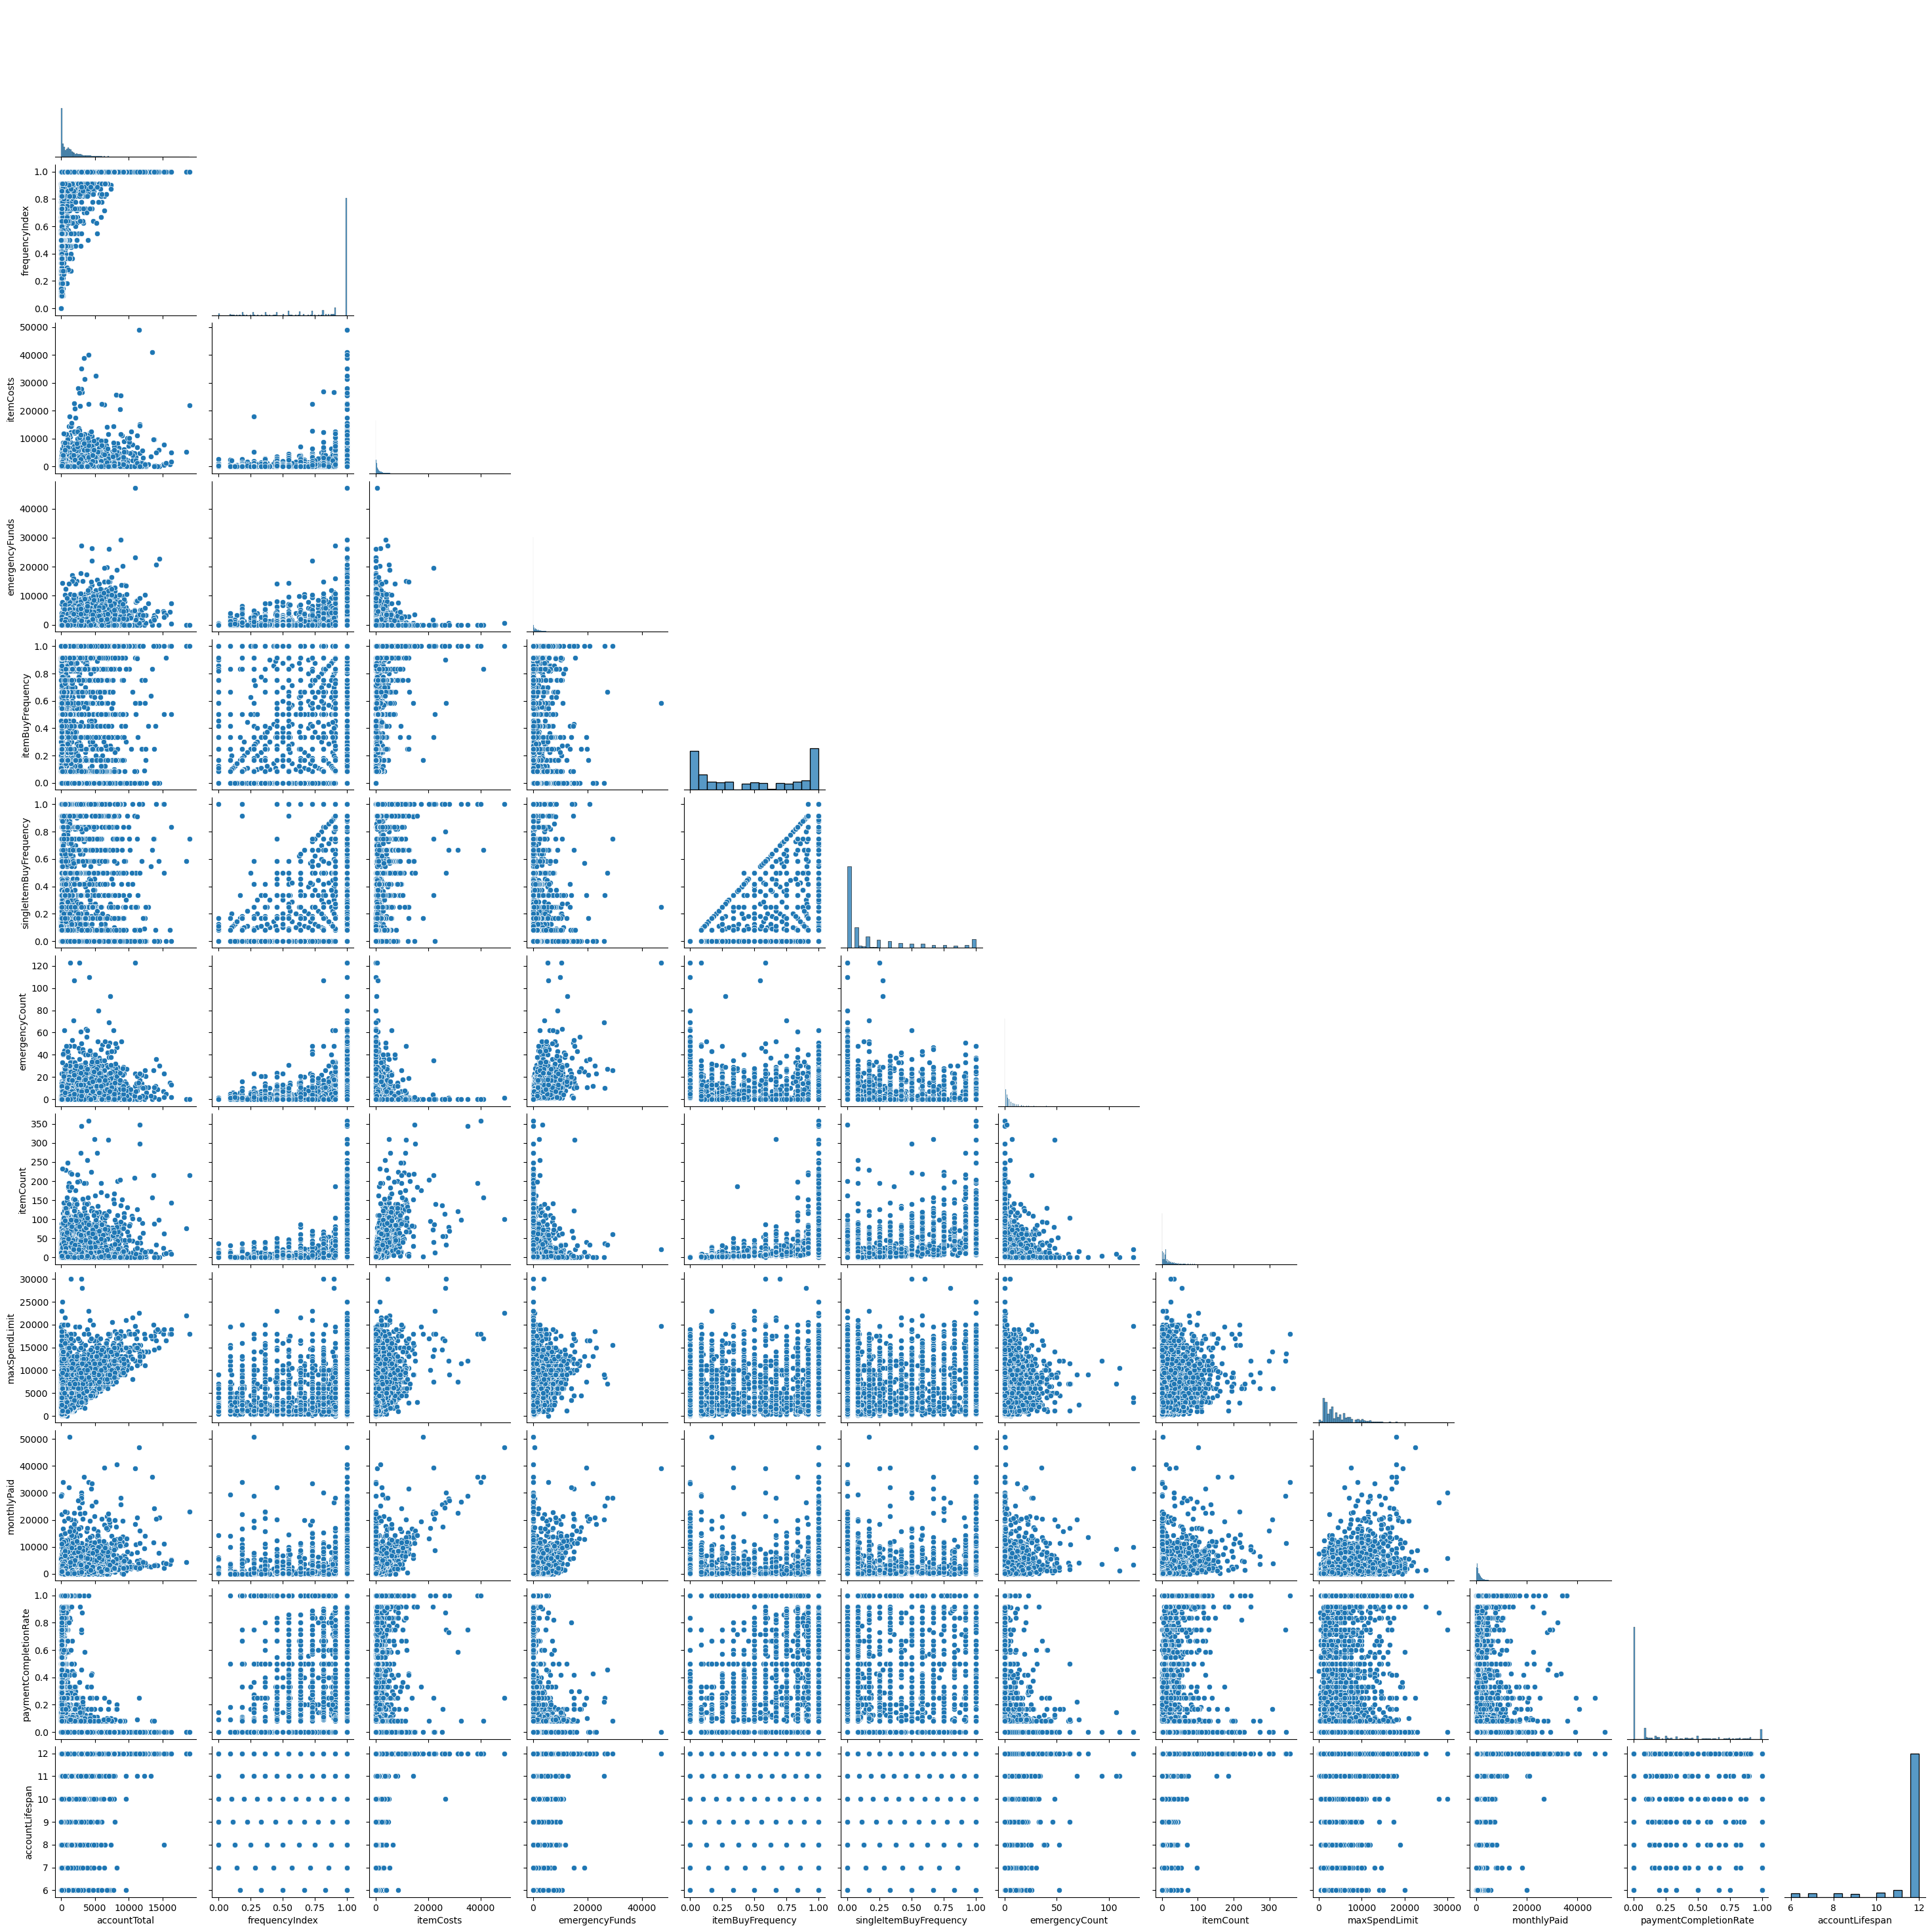

In [26]:
selected_features = [
    "accountTotal", "frequencyIndex", "itemCosts", 
    "emergencyFunds", "itemBuyFrequency", "singleItemBuyFrequency", 
    "emergencyCount", "itemCount", "maxSpendLimit", 
    "monthlyPaid", "paymentCompletionRate", "accountLifespan"
]

sns.pairplot(shopeasy_df_encoded[selected_features], corner=True)
plt.show()

## Scale data


In [27]:
# Selecting columns to scale
columns_to_scale = [col for col in shopeasy_df_encoded.columns]

# Initializing StandardScaler
scaler = StandardScaler()

# Creating a new DataFrame for the scaled version
shopeasy_df_scaled = shopeasy_df_encoded.copy()
shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# Displaying the first few rows of the scaled and encoded dataframe
shopeasy_df_scaled.head()

,accountTotal,frequencyIndex,itemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan
0,-0.254622,-0.185895,0.142653,-0.354938,0.023907,0.997289,-0.329554,-0.270002,-0.822965,-0.516949,-0.194875,-0.525588,-4.126919
1,-0.378000,-0.889766,-0.469584,0.401109,-1.221928,-0.678716,0.696146,-0.591841,-0.685550,-0.567735,-0.300736,-0.525588,-4.126919
2,-0.704885,-0.249881,-0.312920,-0.457482,-1.014290,-0.399383,-0.329554,-0.551611,-0.548135,-0.517810,-0.129560,0.329128,0.360541
3,-0.751704,-3.705263,-0.463663,-0.466805,-1.014290,-0.678716,-0.476083,-0.551611,0.138940,-0.598733,-0.294267,-0.525588,0.360541
4,-0.742998,-1.593641,-0.442906,-0.466805,-0.806649,-0.120047,-0.476083,-0.551611,-0.822965,-0.557822,-0.271587,-0.525588,-4.126919


## Dimention reduction with PCA

In [28]:
from sklearn.decomposition import PCA

# Initialize PCA
pca_model = PCA()
pca_model.fit(shopeasy_df_scaled)

# Explained variances
print('pca.explained_variance_ratio_')
print(pca_model.explained_variance_ratio_, '\n')

# Cumulative explained variances
cum_sum = np.cumsum(pca_model.explained_variance_ratio_)
dimentions = list(range(1, len(cum_sum)+1))

print('cum_sum')
print(cum_sum)

pca.explained_variance_ratio_
[0.26272613 0.20051752 0.09852481 0.07785742 0.07445287 0.06269855
 0.05700261 0.04722414 0.03372954 0.03055837 0.02291343 0.01896048
 0.01283415] 

cum_sum
[0.26272613 0.46324365 0.56176846 0.63962588 0.71407875 0.7767773
 0.83377991 0.88100405 0.91473358 0.94529195 0.96820538 0.98716585
 1.        ]


In [29]:
# Reduce dimensions to 2
pca_model = PCA(n_components=2)
shopeasy_pca = pca_model.fit_transform(shopeasy_df_scaled)

# Freeze values
shopeasy_pca.flags.writeable = False

In [30]:
column_names = shopeasy_df_scaled.columns

# Capture relations of PCA dimension with data features
pca_dimentions_map = pd.DataFrame(pca_model.components_, columns=column_names)
pca_dimentions_map.index = ['PC1', 'PC2']
pca_dimentions_map = pca_dimentions_map.T # Transpose so that columns are the principal components

pca_dimentions_map

,PC1,PC2
accountTotal,0.269229,0.402240
frequencyIndex,0.193442,0.071765
itemCosts,0.428400,-0.159351
emergencyFunds,0.137825,0.494666
itemBuyFrequency,0.286806,-0.344247
singleItemBuyFrequency,0.349709,-0.222360
emergencyCount,0.091335,0.448816
itemCount,0.414628,-0.217750
maxSpendLimit,0.338179,0.167860
monthlyPaid,0.372861,0.157366


In [31]:
# Extract the most important features for each principal component
most_important_feature_pc1 = pca_dimentions_map.nlargest(n=1, columns='PC1').index[0]
most_important_feature_pc2 = pca_dimentions_map.nlargest(n=1, columns='PC2').index[0]

print(f"Most important features for PC1: {most_important_feature_pc1}")
print(f"Most important features for PC2: {most_important_feature_pc2}")

Most important features for PC1: itemCosts
Most important features for PC2: emergencyFunds


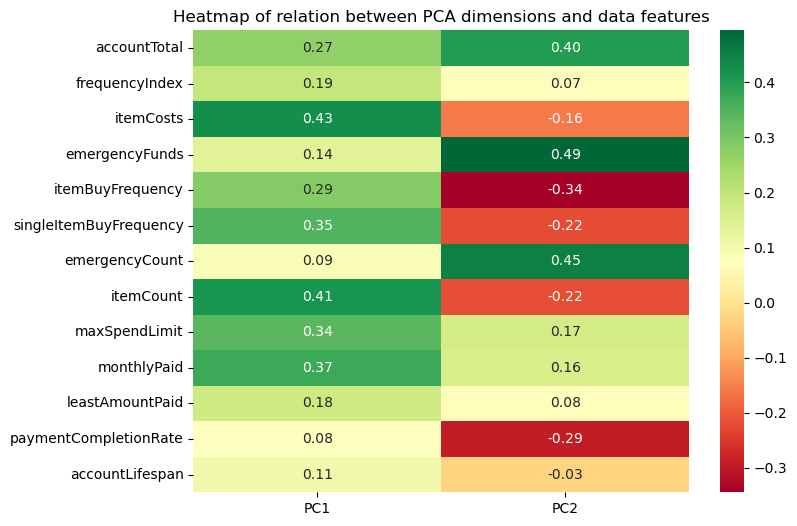

In [32]:
# Plot heatmap of relations
plt.figure(figsize=(8, 6))
plt.title('Heatmap of relation between PCA dimensions and data features')

sns.heatmap(pca_dimentions_map, annot=True, fmt=".2f", cmap='RdYlGn')
plt.show()

# Clustering - Kmean

## Find optimal number of clusters

### Explore via inertia evaluation

C:\Users\Utente\AppData\Local\Temp\ipykernel_16268\2737416761.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


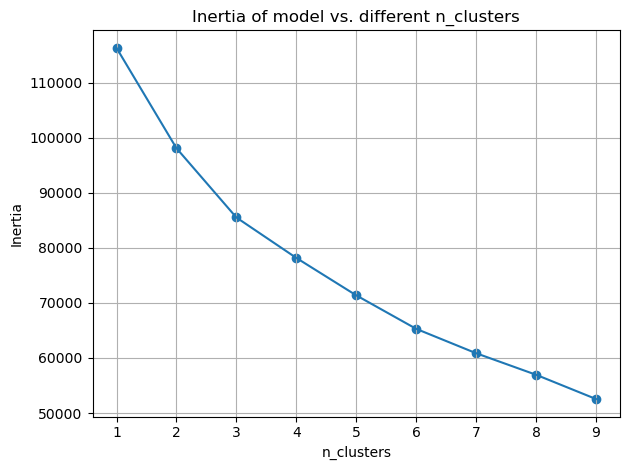

In [33]:
n_clusters_vector = [i for i in range(1,10)]
inertia_vector = []


for n_clusters in n_clusters_vector:
  clustering_method = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42)
  clustering_method.fit(shopeasy_df_scaled)
  inertia_vector.append(clustering_method.inertia_)

fig, ax = plt.subplots()
ax.plot(n_clusters_vector, inertia_vector)
ax.scatter(n_clusters_vector, inertia_vector)
ax.set_title('Inertia of model vs. different n_clusters')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Inertia')
ax.grid()
fig.tight_layout()
fig.show()

### Explore via silhouetting

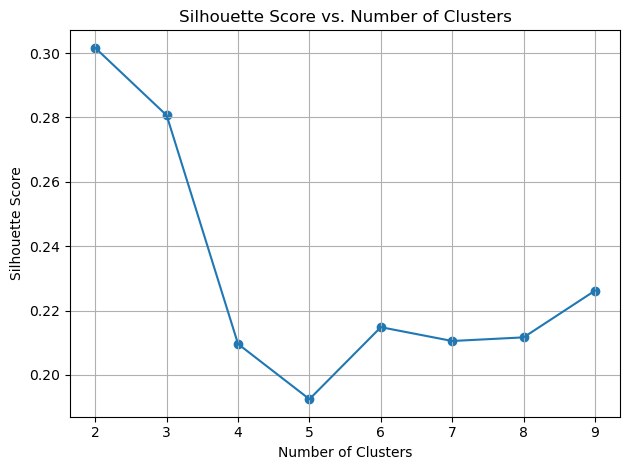

In [34]:
n_clusters_vector = [i for i in range(2, 10)]  # Silhouette score is not defined for 1 cluster
silhouette_scores = []

for n_clusters in n_clusters_vector:
    clustering_method = KMeans(n_clusters=n_clusters, init='random', n_init='auto', random_state=42)
    cluster_labels = clustering_method.fit_predict(shopeasy_df_scaled)
    score = ss(shopeasy_df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette
fig, ax = plt.subplots()
ax.plot(n_clusters_vector, silhouette_scores)
ax.scatter(n_clusters_vector, silhouette_scores)
ax.set_title('Silhouette Score vs. Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.grid()
fig.tight_layout()
plt.show()

The five clusters configuration has the lowest silhouette score.

Therefore clustering will proceed useng four clusters.

### KMeans Clustering

In [35]:
n_clusters = 5

# Fit KMeans to the dataset
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42) 
y_kmeans = kmeans.fit_predict(shopeasy_df_scaled)

In [36]:
# Count rows in each cluster
print("Number of points per cluster (KMeans)")
pd.Series(y_kmeans).value_counts()

Number of points per cluster (KMeans)


3    3183
0    3099
1    1388
4     851
2     428
Name: count, dtype: int64

## Clusters visualisation

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


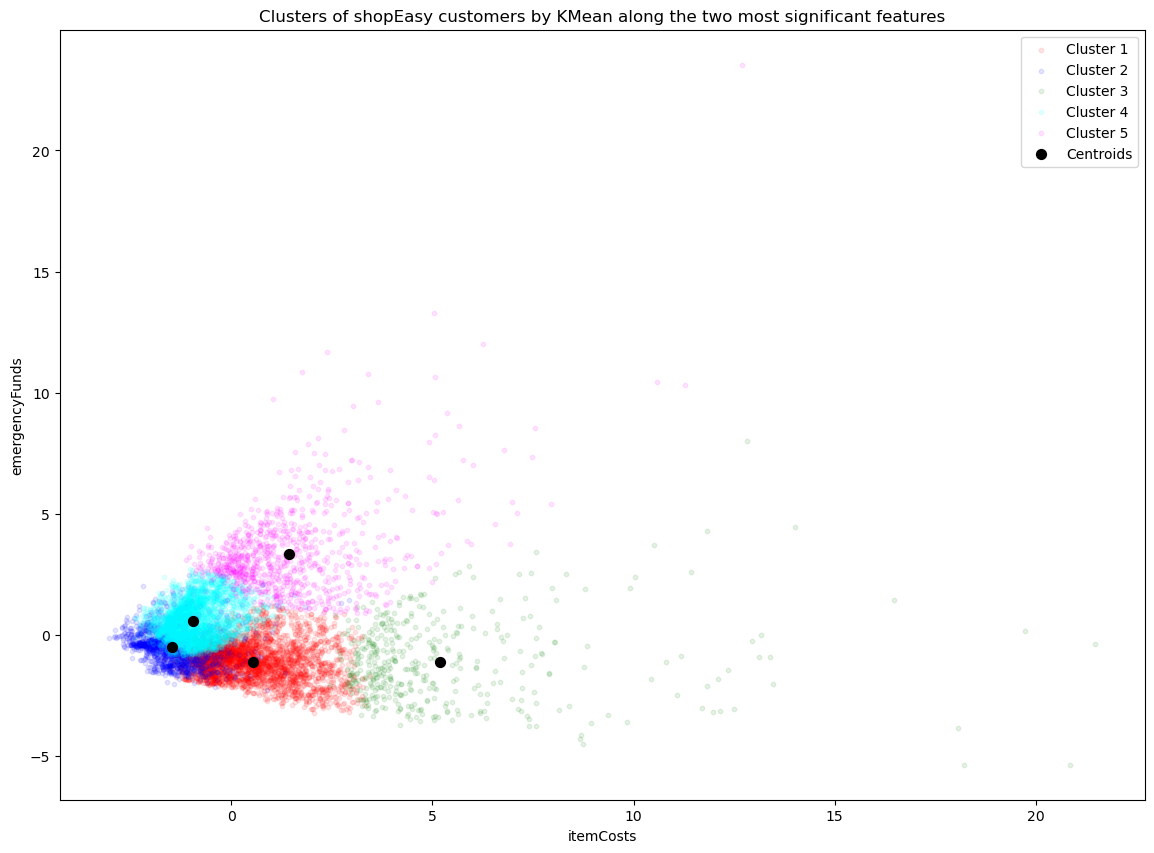

In [37]:
# Visualise clusters along the two most significant dimentions
point_size = 10
alpha = .1
plt.figure(figsize=(14, 10))

# Plot points
plt.scatter(shopeasy_pca[y_kmeans == 0, 0], shopeasy_pca[y_kmeans == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_pca[y_kmeans == 1, 0], shopeasy_pca[y_kmeans == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_pca[y_kmeans == 2, 0], shopeasy_pca[y_kmeans == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
plt.scatter(shopeasy_pca[y_kmeans == 3, 0], shopeasy_pca[y_kmeans == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
plt.scatter(shopeasy_pca[y_kmeans == 4, 0], shopeasy_pca[y_kmeans == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5', alpha=alpha)
#plt.scatter(shopeasy_pca[y_kmeans == 5, 0], shopeasy_pca[y_kmeans == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6', alpha=alpha)
#plt.scatter(shopeasy_pca[y_kmeans == 6, 0], shopeasy_pca[y_kmeans == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7', alpha=alpha)

# Plot centroids
pca_centroids = pca_model.transform(kmeans.cluster_centers_)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s = 5*point_size, c = 'black', label = 'Centroids')

plt.title('Clusters of shopEasy customers by KMean along the two most significant features')
plt.xlabel('itemCosts')
plt.ylabel('emergencyFunds')
plt.legend()
plt.show()


# # Combine PCA results with cluster labels
# shopeasy_pca = pd.DataFrame(data=shopeasy_pca, columns=['PC1', 'PC2'])
# shopeasy_pca['Cluster'] = cluster_labels

# # Visualise the clusters along the two most significant dimentions
# point_size = 10
# alpha = .1
# plt.figure(figsize=(14, 10))

# # Plot points
# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=shopeasy_pca, s = point_size, x='PC1', y='PC2', hue='Cluster', palette="bright", alpha=alpha)
# plt.title('Clusters Visualization Using Kmean')
# plt.xlabel('itemCosts')
# plt.ylabel('emergencyFunds')

# # Plot centroids
# pca_centroids = pca_model.transform(kmeans.cluster_centers_)
# plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s = 5*point_size, c = 'black', label = 'Centroids')

# plt.title('Clusters of shopEasy customers by KMean along the two most significant features')
# plt.legend()
# plt.show()



# Clustering - Hierarchical Clustering

## Find optimal number of clusters

In [43]:
# Calculate linkage matrix encoding (defaults to single and euclidean distance)
linkage_matrix = sch.linkage(shopeasy_df_encoded, method = 'ward')

# Ward's method: distance between two clusters A and B is how much the sum of squares will increase when we merge them
# single for min distance
# complete for max distance
# average for centroid distance
print(linkage_matrix)

[[6.24000000e+02 4.71800000e+03 3.51223665e+00 2.00000000e+00]
 [1.11800000e+03 4.87400000e+03 5.48052179e+00 2.00000000e+00]
 [7.64000000e+02 3.93100000e+03 5.98212337e+00 2.00000000e+00]
 ...
 [1.78870000e+04 1.78910000e+04 2.13347347e+05 3.04000000e+03]
 [1.78930000e+04 1.78940000e+04 2.85560206e+05 3.35000000e+03]
 [1.78920000e+04 1.78950000e+04 4.39991703e+05 8.94900000e+03]]


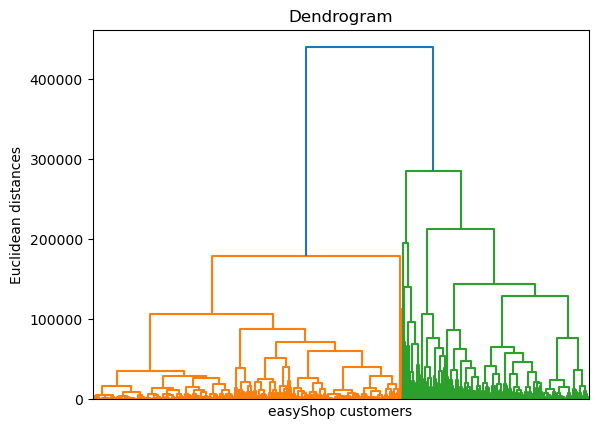

In [39]:
# Plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('easyShop customers')
plt.ylabel('Euclidean distances')
plt.show()

From visual inspection of the dendrogram plot it appears that the customer data may be organised around three clusters.

In [40]:
n_clusters = 3

# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(shopeasy_df_scaled)

In [41]:
# Count rows in each cluster
print("Number of points per cluster (Hierarchical Clustering)")
pd.Series(y_hc).value_counts()

Number of points per cluster (Hierarchical Clustering)


0    7237
1    1242
2     470
Name: count, dtype: int64

## Clusters visualization

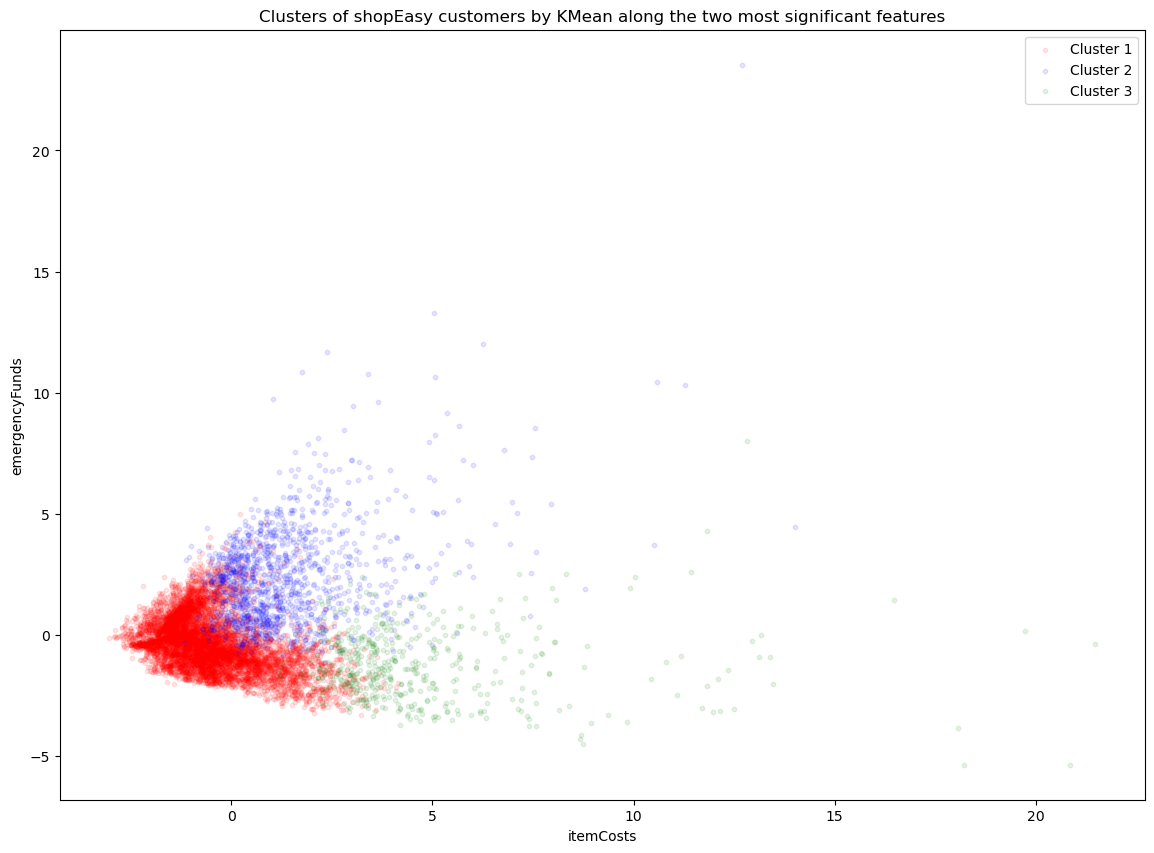

In [42]:
# Visualise the clusters along the two most significant dimentions
point_size = 10
alpha = .1
palette = 'viridis'
plt.figure(figsize=(14, 10))

# Plot points
plt.scatter(shopeasy_pca[y_hc == 0, 0], shopeasy_pca[y_hc == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_pca[y_hc == 1, 0], shopeasy_pca[y_hc == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_pca[y_hc == 2, 0], shopeasy_pca[y_hc == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
#plt.scatter(shopeasy_pca[y_hc == 3, 0], shopeasy_pca[y_hc == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
#plt.scatter(shopeasy_pca[y_hc == 4, 0], shopeasy_pca[y_hc == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5')
#plt.scatter(shopeasy_pca[y_hc == 5, 0], shopeasy_pca[y_hc == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6')
#plt.scatter(shopeasy_pca[y_hc == 6, 0], shopeasy_pca[y_hc == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7')

plt.title('Clusters of shopEasy customers by KMean along the two most significant features')
plt.xlabel('itemCosts')
plt.ylabel('emergencyFunds')
plt.legend()
plt.show()

# Properties of customer clusters